In [1]:
import DataImport_header as h
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy import stats
from scipy.ndimage.filters import uniform_filter1d

from scipy import constants
from timeit import timeit

import Analysis_header as an
import scipy.fftpack
import scipy.optimize

C:\Users\Brian Bostwick\AppData\Local\Temp\ipykernel_28644\2281188213.py:7: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [2]:
#contants
e       = sp.constants.value(u'elementary charge')            #1.602176634e-19 C
epsilon = sp.constants.value(u'vacuum electric permittivity') #8.8541878128e-12 F m^-1
pi      = sp.pi                                               #3.141592653589793
m_e     = sp.constants.value(u'electron mass')                #9.1093837015e-31 kg
c       = sp.constants.value(u'speed of light in vacuum')     #299792458.0 m s^-1

kg2amu = sp.constants.value(u'kilogram-atomic mass unit relationship') #6.0221407621e+26 u
amu2kg = 1/kg2amu

line = "____________________________________________________"
bline= "===================================================="

def trap_freq( position, PosData, dt, steps, period):
    time = np.linspace(0, steps*dt, int(steps/period))
    x  = an.reformat(PosData, position)
    fit = an.fit_sin(time, x)
    fit_curve = fit["fitfunc"]
    return fit["omega"]
    
def total_energy(w, mass, x, v):
    return 0.5 * mass * v**2 + 0.5 * mass * w**2 * x**2 

In [15]:
dt    = 1.0e-7      #meters
steps = 200000
period = 1         #interval for taking data
mass  = 87*1.66e-27 #amu


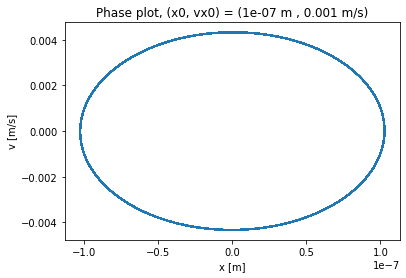

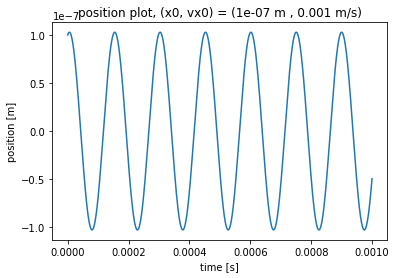

In [28]:
pos  = "/pos_x"
vel  = "/vel_x"

#workcomupterv
filePos = "../evaperative_cooling" + pos + ".txt"
fileVel = "../evaperative_cooling" + vel + ".txt"

PosData = an.get_particle_data( filePos )
VelData = an.get_particle_data( fileVel )

#getting velocity
velocity = [an.get_particle_velocity(VelData[2][i][0]) for i in range(len(VelData[2]))]

vx = [ VelData[2][i][0][0] for i in range(len(VelData[2])) ]

#getting positions; all position ar taken rel. to the beam direction.
x  = an.reformat(PosData[2], 0)

time = np.linspace(0, dt*steps, steps)



plt.plot(x,vx)
plt.title(f"Phase plot, (x0, vx0) = ({x[0]} m , {vx[0]} m/s)")
plt.xlabel(f"x [m]")
plt.ylabel(f"v [m/s]")
plt.show()

plt.plot(time[:10000], x[:10000])
plt.title(f"position plot, (x0, vx0) = ({x[0]} m , {vx[0]} m/s)")
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

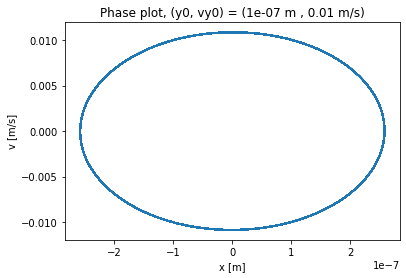

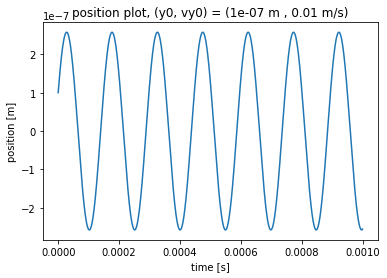

In [27]:
pos  = "/pos_y"
vel  = "/vel_y"

#workcomupterv
filePos = "../evaperative_cooling" + pos + ".txt"
fileVel = "../evaperative_cooling" + vel + ".txt"

PosData = an.get_particle_data( filePos )
VelData = an.get_particle_data( fileVel )

#getting velocity
velocity = [an.get_particle_velocity(VelData[2][i][0]) for i in range(len(VelData[2]))]

vy = [ VelData[2][i][0][1] for i in range(len(VelData[2])) ]

#getting positions; all position ar taken rel. to the beam direction.
y  = an.reformat(PosData[2], 1)

time = np.linspace(0, dt*steps, steps)

plt.plot(y,vy)
plt.title(f"Phase plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)")
plt.xlabel(f"x [m]")
plt.ylabel(f"v [m/s]")
plt.show()

plt.plot(time[:10000], y[:10000])
plt.title(f"position plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)")
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

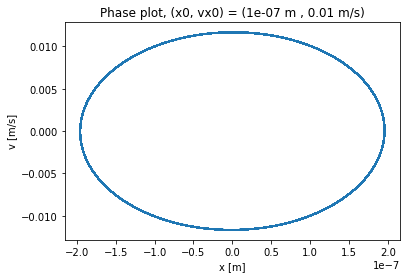

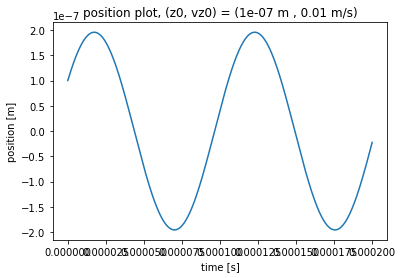

In [143]:
pos  = "/pos_z"
vel  = "/vel_z"

#workcomupterv
filePos = "../evaperative_cooling" + pos + ".txt"
fileVel = "../evaperative_cooling" + vel + ".txt"

PosData = an.get_particle_data( filePos )
VelData = an.get_particle_data( fileVel )

#getting velocity
velocity = [an.get_particle_velocity(VelData[2][i][0]) for i in range(len(VelData[2]))]

vz = [ VelData[2][i][0][2] for i in range(len(VelData[2])) ]

#getting positions; all position ar taken rel. to the beam direction.
z  = an.reformat(PosData[2], 2)

time = np.linspace(0, dt*steps, steps)



plt.plot(z,vz)
plt.title(f"Phase plot, (x0, vx0) = ({z[0]} m , {vz[0]} m/s)")
plt.xlabel(f"x [m]")
plt.ylabel(f"v [m/s]")
plt.show()


plt.plot(time[:2000], z[:2000])
plt.title(f"position plot, (z0, vz0) = ({z[0]} m , {vz[0]} m/s)")
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

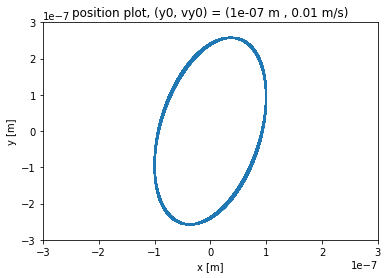

In [157]:
dt    = 1.0e-7      #meters
steps = 1000000
period = 1         #interval for taking data
mass  = 87*1.66e-27 #amu


pos  = "/pos_xy1"
vel  = "/vel_xy1"

#workcomupterv
filePos = "../evaperative_cooling" + pos + ".txt"
fileVel = "../evaperative_cooling" + vel + ".txt"

PosData = an.get_particle_data( filePos )
VelData = an.get_particle_data( fileVel )

#getting velocity
velocity = [an.get_particle_velocity(VelData[2][i][0]) for i in range(len(VelData[2]))]

vx = [ VelData[2][i][0][0] for i in range(len(VelData[2])) ]
vy = [ VelData[2][i][0][1] for i in range(len(VelData[2])) ]
vz = [ VelData[2][i][0][2] for i in range(len(VelData[2])) ]

#getting positions; all position ar taken rel. to the beam direction.
x  = an.reformat(PosData[2], 0)
y  = an.reformat(PosData[2], 1)
z  = an.reformat(PosData[2], 2)

time = np.linspace(0, dt*steps, steps)

# plt.plot(z,vz)
# plt.title(f"Phase plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)")
# plt.xlabel(f"[m]")
# plt.ylabel(f"[m/s]")
# plt.show()

plt.plot(x, y)
plt.title(f"position plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)")
plt.xlabel(f"x [m]")
plt.ylabel(f"y [m]")

plt.ylim(-3e-7,3e-7)
plt.xlim(-3e-7,3e-7)
plt.show()

# import numpy as np
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.plot(x,y,z)
# ax.view_init(60, 0)
# plt.show()

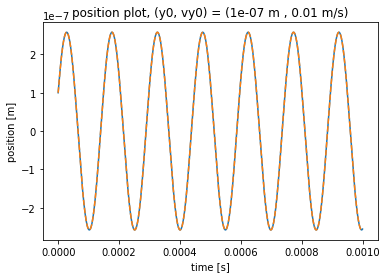

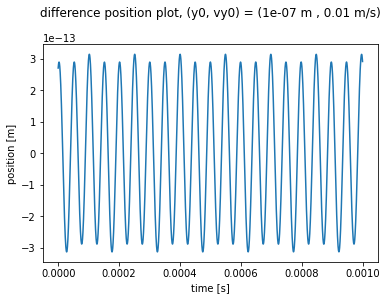

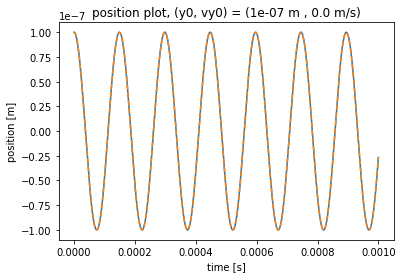

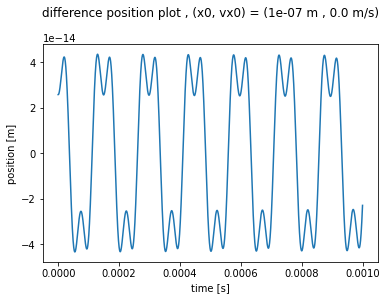

In [78]:
def trap_fit( position, PosData, dt, steps, period):
    time = np.linspace(0, steps*dt, int(steps/period))
    x  = an.reformat(PosData, position)
    fit = an.fit_sin(time, x)
    fit_curve = fit["fitfunc"]
    return fit_curve


truncate = 10000


y_fit = trap_fit( 1, PosData[2], dt, steps, period)

plt.plot(time[:truncate], y[:truncate])
plt.plot(time[:truncate], y_fit(time[:truncate]), "--")
plt.title(f"position plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)")
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

plt.plot(time[:truncate], y[:truncate]-y_fit(time[:truncate]))
plt.title(f"difference position plot, (y0, vy0) = ({y[0]} m , {vy[0]} m/s)", y = 1.1)
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()




x_fit = trap_fit( 0, PosData[2], dt, steps, period)

plt.plot(time[:truncate], x[:truncate])
plt.plot(time[:truncate], x_fit(time[:truncate]), "--")
plt.title(f"position plot, (y0, vy0) = ({x[0]} m , {vx[0]} m/s)")
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

plt.plot(time[:truncate], x[:truncate]-x_fit(time[:truncate]))
plt.title(f"difference position plot , (x0, vx0) = ({x[0]} m , {vx[0]} m/s)", y = 1.1)
plt.xlabel(f"time [s]")
plt.ylabel(f"position [m]")
plt.show()

* based if these plots of the difference fron the fit and the actual data from simulations it does apear that there is some variation in the position as a function of time. This can be due to flucuation in the intentiy calcualtion over over time, simply from errors in the integrator in AtomECS. 

In [138]:
def reformat_temp(data, position):
    x = []
    for i in range(1, len(data)):
        x.append(data[i][0][position])
    return x

dt    = 1.0e-7      #meters
steps = 1000000
period = 1         #interval for taking data
mass  = 87*1.66e-27 #amu


intensity  = "/intensity"

#work computer
fileintensity = "../evaperative_cooling" + intensity + ".txt"

intensityData = an.get_particle_data( fileintensity )

laser_1 = reformat_temp(intensityData[2], 0)
laser_2 = reformat_temp(intensityData[2], 1)

total_feild_intensity = [ laser_1[i] + laser_2[i] for i in range(len(laser_1))]

time = np.linspace(0, dt*steps, steps-1) # steps-1 is to adjust for the lack of an initial intensity value



#testing to make sure all the values are truly posistve. 
test = False
for i in total_feild_intensity:
    if i < 0:
        print("less then 0")
        test = True
        break
if not test:
    print("all greater then 0")


all greater then 0


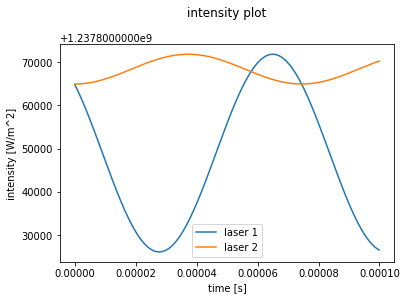

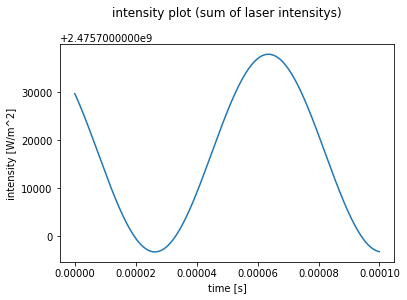

In [139]:
truncate = 1000
plt.plot(time[:truncate], laser_1[:truncate], label = "laser 1")
plt.plot(time[:truncate], laser_2[:truncate], label = "laser 2")
plt.title(f"intensity plot", y = 1.1)
plt.xlabel(f"time [s]")
plt.ylabel(f"intensity [W/m^2]")
plt.legend()
plt.show()

plt.plot(time[:truncate], total_feild_intensity[:truncate])
plt.title(f"intensity plot (sum of laser intensitys)", y = 1.1)
plt.xlabel(f"time [s]")
plt.ylabel(f"intensity [W/m^2]")
plt.show()

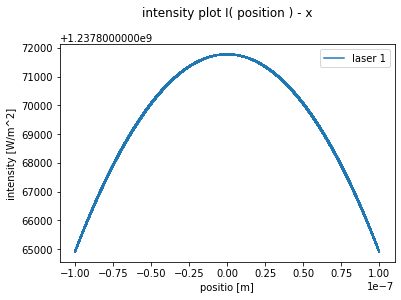

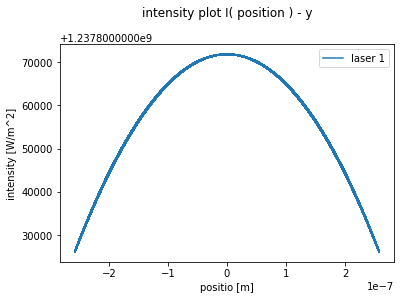

In [155]:
truncate = 100000
plt.plot( x[:truncate], laser_2[:truncate], label = "laser 2")
plt.title(f"intensity plot I( position ) - x", y = 1.1)
plt.xlabel(f"positio [m]")
plt.ylabel(f"intensity [W/m^2]")
plt.legend()
plt.show()

truncate = 100000
plt.plot( y[:truncate], laser_1[:truncate], label = "laser 1")
plt.title(f"intensity plot I( position ) - y", y = 1.1)
plt.xlabel(f"positio [m]")
plt.ylabel(f"intensity [W/m^2]")
plt.legend()
plt.show()

* Using the plot of position one can diduce which laser corrispnads to each intesity porfile becouse the the laser has a higher intentiy closer to (0,0,0), since the x direction vvariser less and is oscliates around the the origin closly it corrispands to laser two. 

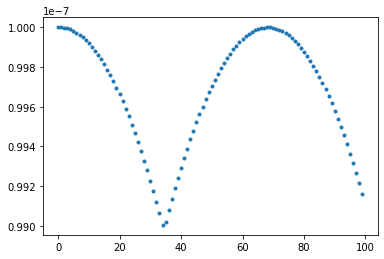

In [209]:
reduced_x = []
for i in x:
    if  i > 0.99e-7:
        reduced_x.append(i)
    

plt.plot(reduced_x[:100], '.')